In [4]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/uchicago/sociohydro/sim/meanField/SchellingMF`


In [5]:
using ModelingToolkit
using PyPlot
using DifferentialEquations
plt = PyPlot;

LoadError: ArgumentError: Package ModelingToolkit [961ee093-0014-501f-94e3-6117800e7a78] is required but does not seem to be installed:
 - Run `Pkg.instantiate()` to install all recorded dependencies.


Solving Lotka-Volterra
$$
\begin{align}
\dfrac{dx}{dt} &= \alpha x - \beta x y \\
\dfrac{dy}{dt} &= -\gamma y + \delta xy \\
z(t) &= x(t) + y(t)
\end{align}
$$

In [17]:
# Define our state variables: state(t) = initial condition
@variables t x(t)=1 y(t)=1 z(t)=2

# Define our parameters
@parameters α=1.5 β=1.0 γ=3.0 δ=1.0

# Define our differential: takes the derivative with respect to `t`
D = Differential(t)

# Define the differential equations
eqs = [D(x) ~ α * x - β * x * y
       D(y) ~ -γ * y + δ * x * y
       z ~ x + y]

# Bring these pieces together into an ODESystem with independent variable t
@named sys = ODESystem(eqs, t)

# Symbolically Simplify the System
simpsys = structural_simplify(sys)

# Convert from a symbolic to a numerical problem to simulate
tspan = (0.0, 10.0)
prob = ODEProblem(simpsys, [], tspan)

# Solve the ODE
sol = solve(prob);

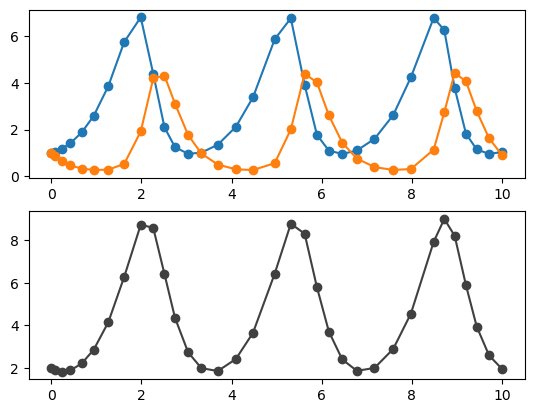

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x2c4463f40>

In [28]:
fig, ax = plt.subplots(2)
ax[1].plot(sol.t, sol.u, "o-")
ax[2].plot(sol.t, sol[z], "o-", color="0.25")